In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
delt = pd.read_csv("D:\\EXCEL R\\ASSIGNMENTS\\simple linear regression\\delivery_time.csv")

In [3]:
delt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
delt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
delt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [10]:
delt = delt.rename({"Delivery Time" : "delivery_time"}, axis = 1)

In [11]:
delt = delt.rename({"Sorting Time" : "sorting_time"}, axis = 1)

In [13]:
delt.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

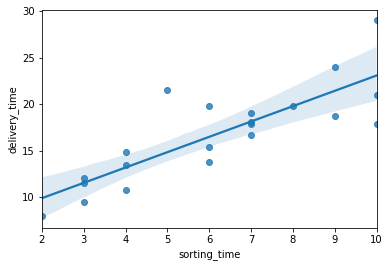

In [28]:
sns.regplot( x="sorting_time",y="delivery_time", data = delt)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

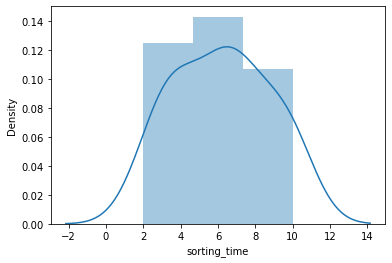

In [15]:
sns.distplot(delt["sorting_time"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

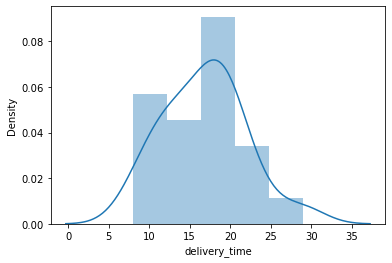

In [16]:
sns.distplot(delt["delivery_time"])

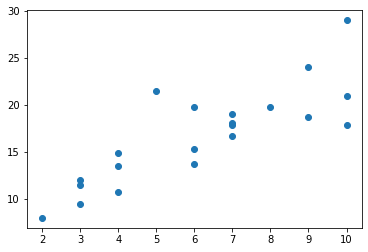

In [17]:
plt.scatter(delt["sorting_time"], delt["delivery_time"])

In [18]:
model = smf.ols("delivery_time~sorting_time", data = delt).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        11:01:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
prediction = model.predict(delt.sorting_time)

In [24]:
prediction

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [25]:
rmse_lin =np.sqrt(np.mean((delt.sorting_time-prediction)**2))
rmse_lin

10.722052392104555

Text(0, 0.5, 'delivery_time')

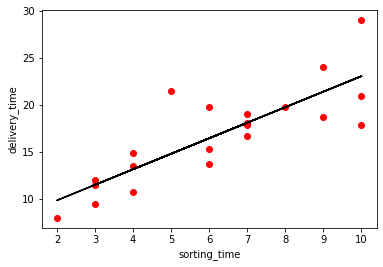

In [26]:
import matplotlib.pylab as plt
plt.scatter(x=delt['sorting_time'],y=delt['delivery_time'],color='red')
plt.plot(delt['sorting_time'],prediction,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

Text(0, 0.5, 'Actual')

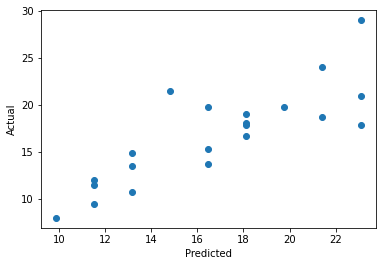

In [27]:
plt.scatter(x=prediction,y=delt.delivery_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# log transformation

In [30]:
model1 = smf.ols("delivery_time~np.log(sorting_time)", data = delt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           2.64e-06
Time:                        11:13:09   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred1 = model1.predict(delt.sorting_time)
pred1

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [39]:
rmse_log =np.sqrt(np.mean((delt.sorting_time-pred1)**2))
rmse_log

10.749542066249484

Text(0, 0.5, 'delivery_time')

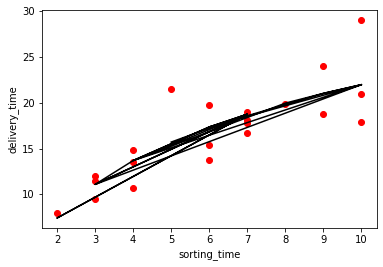

In [34]:
import matplotlib.pylab as plt
plt.scatter(x=delt['sorting_time'],y=delt['delivery_time'],color='red')
plt.plot(delt['sorting_time'],pred1,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

Text(0, 0.5, 'Actual')

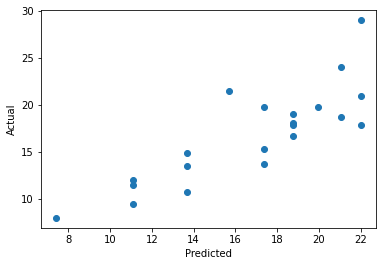

In [36]:
plt.scatter(x=pred1,y=delt.delivery_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Exponenetial transformation

In [37]:
model2 = smf.ols("np.log(delivery_time)~sorting_time", data = delt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 17 Mar 2021   Prob (F-statistic):           1.59e-06
Time:                           11:18:47   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
pred2_log = model2.predict(delt.sorting_time)
pred2 = np.exp(pred2_log)
pred2

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [44]:
rmse_exp =np.sqrt(np.mean((delt.sorting_time-pred2)**2))
rmse_exp

10.574753678890934

Text(0, 0.5, 'delivery_time')

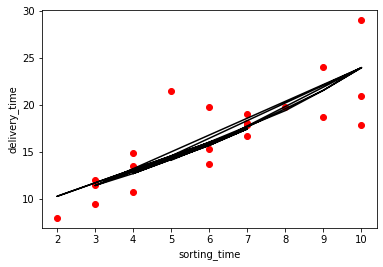

In [42]:
import matplotlib.pylab as plt
plt.scatter(x=delt['sorting_time'],y=delt['delivery_time'],color='red')
plt.plot(delt['sorting_time'],pred2,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

Text(0, 0.5, 'Actual')

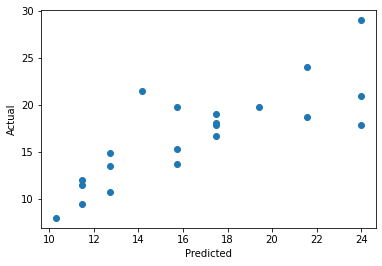

In [43]:
plt.scatter(x=pred2,y=delt.delivery_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Quad equation

In [47]:
delt['sorting_time_sq'] = delt.sorting_time*delt.sorting_time
delt

,delivery_time,sorting_time,sorting_time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [49]:
model3 = smf.ols("np.log(delivery_time)~sorting_time+sorting_time_sq", data = delt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Wed, 17 Mar 2021   Prob (F-statistic):           2.20e-06
Time:                           11:30:03   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time        0.2659      0.080      3.315      0.004       0.097       0.434
sorting_time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
pred_quad =model3.predict(delt)
pred_quad

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [54]:
pred3 = np.exp(pred_quad)
pred3

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [55]:
rmse_quad =np.sqrt(np.mean((delt.sorting_time-pred3)**2))
rmse_quad

10.549894062750672

Text(0, 0.5, 'delivery_time')

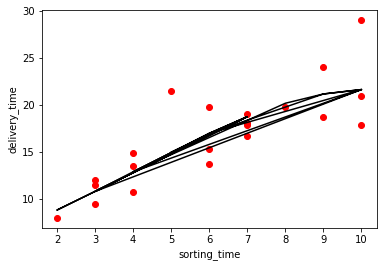

In [56]:
import matplotlib.pylab as plt
plt.scatter(x=delt['sorting_time'],y=delt['delivery_time'],color='red')
plt.plot(delt['sorting_time'],pred3,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

Text(0, 0.5, 'Actual')

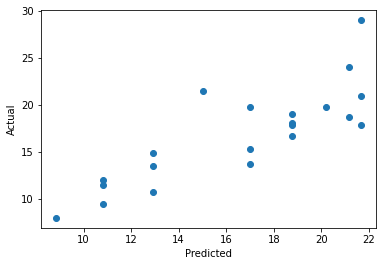

In [57]:
plt.scatter(x=pred3,y=delt.delivery_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [58]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,10.722052,0.682271
1,rmse_log,10.749542,0.695443
2,rmse_exp,10.574754,0.710948
3,rmse_quad,10.549894,0.764867


RMSE quad has a highest Rsquare value